<a href="https://colab.research.google.com/github/SushmithaUW/Homesickness-Prediction/blob/master/Copy_of_Homesickness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import random
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn import preprocessing


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np



In [0]:
#load the data
train = pd.read_csv('data.csv')
train.head()

#remove the unwanted columns and rows containing null values
train = train.drop('Timestamp',axis=1)
train = train.drop('Unnamed: 13', axis=1)
train = train.drop('Unnamed: 14', axis=1)


#Make the column header readable
train.columns=['Age', 'Gender', 'International_Student', 'Educational_level', 'Course_difficulty', 'Networking', 'Financial_aid', 'Friends', 'Siblings', 'Howmetown_visits', 'Cooking', 'Homesickness']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 12 columns):
Age                      116 non-null object
Gender                   116 non-null object
International_Student    115 non-null object
Educational_level        116 non-null object
Course_difficulty        116 non-null int64
Networking               116 non-null object
Financial_aid            116 non-null object
Friends                  116 non-null object
Siblings                 116 non-null object
Howmetown_visits         116 non-null object
Cooking                  116 non-null object
Homesickness             116 non-null object
dtypes: int64(1), object(11)
memory usage: 11.0+ KB


In [0]:
#There are same values (I don't know, Thirce, Twice, etc,) amoung columns
#We will try to uniquely represent the values of each of the column. 
df = []
df = train['Course_difficulty']
df.replace(1,'Easy',True)
df.replace(2,'Easy',True)
df.replace(3,'Moderate',True)
df.replace(4,'Moderate',True)
df.replace(5,'Difficult',True)
train['Course_difficulty'] = df
train['Course_difficulty'].unique()

df = []
df = train['Networking']
df.replace("I don't know",'Does not know about netwrking',True)
df.replace('Once','Networking happens once',True)
df.replace('Twice','Networking happens twice',True)
df.replace('Thrice or more','Networking happens often',True)
train['Networking'] = df
train['Networking'].unique()

df = []
df = train['Financial_aid']
df.replace("I don't know",'Does not know about financial aid',True)
df.replace('Yes','University provides financial aid',True)
df.replace('No','University does not provide financial aid',True)
df.replace('Thrice or more','Networking happens often',True)
train['Financial_aid'] = df
train['Financial_aid'].unique()



df = []
df = train['Friends']
df.replace('4 or more','Extrovert',True)
df.replace('3 or more','Friendly',True)
df.replace('0','Lonely',True)
df.replace('2','Introvert',True)
df.replace('5 or more','Extrovert',True)
df.replace('1','Lonely',True)
df.replace('3','Friendly',True)
df.replace('4','Extrovert',True)
train['Friends'] = df
train['Friends'].unique()

df = []
df = train['Siblings']
df.replace('0','Single Child',True)
df.replace('1','One sibling',True)
df.replace('2','Two siblings',True)
df.replace('3','Three siblings',True)
df.replace('4','Large family',True)
df.replace('5 or more','Large family',True)
train['Siblings'] = df
train['Siblings'].unique()

df = []
df = train['Howmetown_visits']
df.replace('Once','Visits once',True)
df.replace('Never','Never visits',True)
df.replace('Twice','Visits twice',True)
df.replace('Thrice or more','Visits often',True)
train['Howmetown_visits'] = df
train['Howmetown_visits'].unique()


df = []
df = train['Cooking']
df.replace('Thrice','Cooks thrice',True)
df.replace('Thrice or more','Cooks very often',True)
df.replace('2 to 3 times','Cooks twice',True)
df.replace('4 to 6 times','Cooks very often',True)
df.replace('Never','Never cooks',True)
df.replace('Everyday','Cooks everyday',True)
train['Cooking'] = df
train['Cooking'].unique()


array(['Cooks thrice', 'Cooks very often', 'Cooks twice',
       'Cooks everyday', 'Never cooks'], dtype=object)

In [0]:

#Filter out the local students and remove the nan records
train = train.dropna()
local_students = train[ train['International_Student'] == 'No' ].index
train.drop(local_students , inplace=True)
train['International_Student'].unique()
train = train.drop('International_Student', axis=1)

print (len(train))

55


In [0]:

for column in train.columns:
    if train[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        train[column] = le.fit_transform(train[column])
        

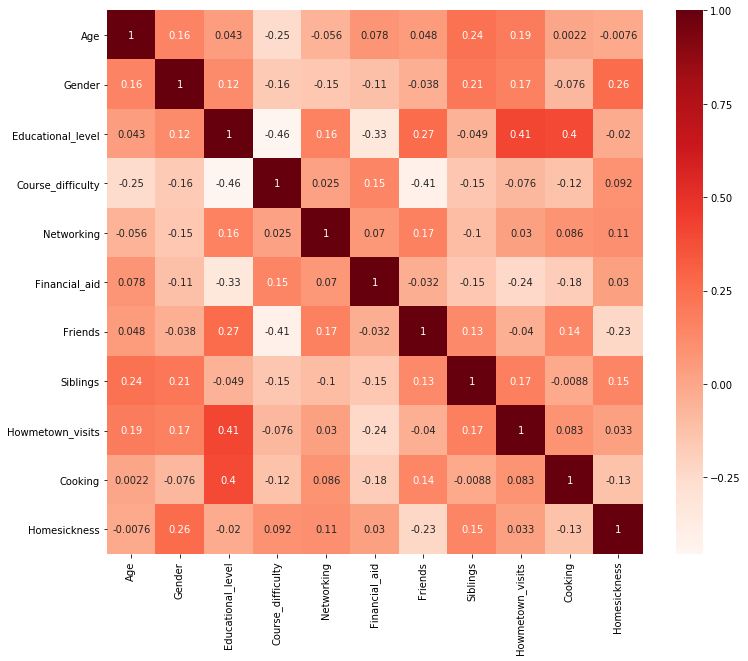

In [0]:
plt.figure(figsize=(12,10))
corr = train.corr()
s = sns.heatmap(corr, annot = True, cmap=plt.cm.Reds)
plt.show()

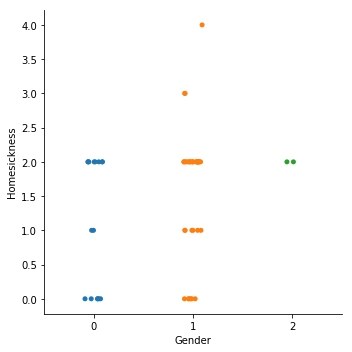

In [0]:
s = sns.catplot(x="Gender", y="Homesickness", data=train);
s.savefig("gender.png")


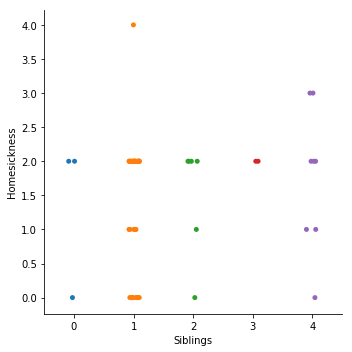

In [0]:
s = sns.catplot(x="Siblings", y="Homesickness", data=train);
s.savefig("sib.png")

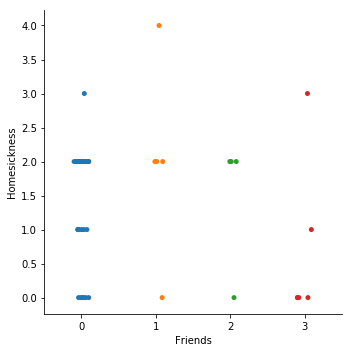

In [0]:
s = sns.catplot(x="Friends", y="Homesickness", data=train);
s.savefig("friens.png")

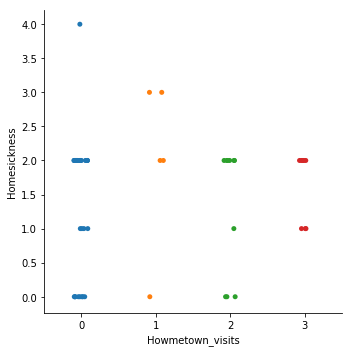

In [0]:
s = sns.catplot(x="Howmetown_visits", y="Homesickness", data=train);
s.savefig("hometown.png")

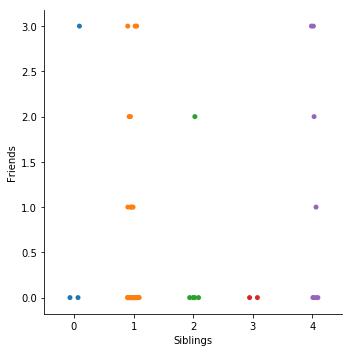

In [0]:
s = sns.catplot(x="Siblings", y="Friends", data=train);
s.savefig("Sib_friends.png")


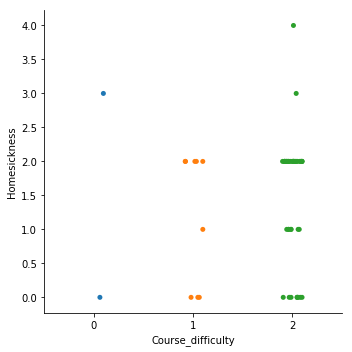

In [0]:
s = sns.catplot(x="Course_difficulty", y="Homesickness", data=train);
s.savefig("course.png")


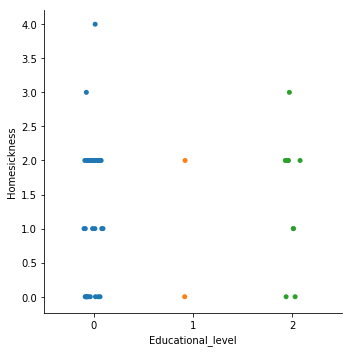

In [0]:
s = sns.catplot(x="Educational_level", y="Homesickness", data=train);
s.savefig("course.png")

In [0]:

random.seed(300)
random.shuffle(train.values)

#Data split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Homesickness',axis=1),train['Homesickness'], test_size=0.20, random_state=101)
y_test = y_test.values


In [0]:
num_folds = 10
num_instances = len(X_train)
seed = 300
scoring = 'accuracy'
results = []
names = []
    
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('DT with gini',DecisionTreeClassifier(criterion = "gini")))
models.append(('DT with entropy', DecisionTreeClassifier(criterion = "entropy")))
models.append(('Naive Bayes', MultinomialNB()))

In [0]:
print ("Cross Validation score for various models:")
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold) # Could not convert string to float happens here. Scoring uses string. 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean()*100)#multiplying by 100 to show percentage
    print(msg)
print("\n")    

Cross Validation score for various models:
Logistic Regression: 77.000000
DT with gini: 78.500000
DT with entropy: 80.500000
Naive Bayes: 77.000000




In [0]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.6363636363636364

In [0]:
y_pred = DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [0]:
y_pred = DecisionTreeClassifier(criterion = "gini").fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [0]:
y_pred = MultinomialNB().fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.5454545454545454

In [0]:

#Penalty: l1 or l2 which species the norm used in the penalization.
#C: Inverse of regularization strength- smaller values of C specify stronger regularization.
#class_weight works: It penalizes mistakes in samples of class[i] with class_weight[i]
clf = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['saga', 'lbfgs']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight)

grid = GridSearchCV(estimator=clf,
                    param_grid=param_grid,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print ("\nParameter tuning for Logistic Regression:")
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
print("\n")



Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



Parameter tuning for Logistic Regression:
Best Score:  0.8181818181818182
Best Params:  {'C': 1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2'}




[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:    3.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
clf = DecisionTreeClassifier()
parameters = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
grid = GridSearchCV(clf,parameters)
grid_result = grid.fit(X_train,y_train)
print ("Parameter tuning for Decision Tree Classifier:")
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
print("\n")

Parameter tuning for Decision Tree Classifier:
Best Score:  0.7954545454545454
Best Params:  {'max_depth': 3, 'min_samples_split': 10}




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
clf = MultinomialNB()
parameters=dict(alpha=np.linspace(0,2,20)[1:])
grid = GridSearchCV(clf,parameters)
grid_result = grid.fit(X_train,y_train)
print ("Parameter tuning for NB Classifier:")
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)
print("\n")


Parameter tuning for NB Classifier:
Best Score:  0.8181818181818182
Best Params:  {'alpha': 0.7368421052631579}




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [0]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=0, solver='saga',multi_class='multinomial', penalty = 'l2', class_weight = {1: 0.5, 0: 0.5})))
models.append(('DT with gini',DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_split = 10)))
models.append(('DT with entropy', DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_split = 10)))
models.append(('Naive Bayes', MultinomialNB(alpha=0.73)))

In [0]:
print ("Cross Validation score after parameter tuning:")
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold) # Could not convert string to float happens here. Scoring uses string. 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean()*100)#multiplying by 100 to show percentage
    print(msg)


Cross Validation score after parameter tuning:
Logistic Regression: 79.500000
DT with gini: 80.500000
DT with entropy: 75.500000
Naive Bayes: 75.000000


In [0]:
y_pred = LogisticRegression(random_state=0, solver='saga',multi_class='multinomial', penalty = 'l2', class_weight = {1: 0.5, 0: 0.5}).fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.6363636363636364

In [0]:
y_pred = DecisionTreeClassifier(criterion = "gini", max_depth = 3, min_samples_split = 10).fit(X_train,y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [0]:
y_pred = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, min_samples_split = 10).fit(X_train,y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

In [0]:
y_pred = MultinomialNB(alpha=0.73).fit(X_train, y_train).predict(X_test)
accuracy_score(y_test, y_pred)

0.5454545454545454